<a href="https://colab.research.google.com/github/MianUsmanAhmed12/lab3/blob/main/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#help taken from https://github.com/KilledByBugs/CE888_labs/blob/main/bank_classification(lab3).ipynb but it is not
#entirely its copy.i copied code where i needed it and modified it according to my need.
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
df = pd.read_csv("bank-additional-full.csv",delimiter=";")
df

features = ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
outcomes = ["y"]

df[outcomes].head()

,y
0,no
1,no
2,no
3,no
4,no


In [ ]:
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)
df = df.apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [ ]:

df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [ ]:
df = df.drop(['duration'], axis=1)

In [ ]:
X_df = df[features].copy()
y_df = df[outcomes].copy()
X = X_df.values
y = y_df.values

In [ ]:
from sklearn.model_selection import train_test_split #GUANNAN ADDED
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50,stratify=y)

In [ ]:

dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf, X_train, y_train.ravel(), cv=10, scoring='f1')
dummy_clf.fit(X_train, y_train.ravel())
print(dummy_scores.mean())


0.11565765574110347


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=8)
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='f1')  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.33 +/- 0.04


[17 18 11 13 14 16 15  0  8  7  9 12 10  3  1  2  5  4  6]
Feature ranking:
1. euribor3m (0.204465)
2. nr.employed (0.203024)
3. pdays (0.121707)
4. poutcome (0.090553)
5. emp.var.rate (0.072636)
6. cons.conf.idx (0.067101)
7. cons.price.idx (0.048075)
8. age (0.036239)
9. month (0.034842)
10. contact (0.019558)
11. day_of_week (0.019447)
12. previous (0.018723)
13. campaign (0.015432)
14. education (0.014069)
15. job (0.013783)
16. marital (0.006985)
17. housing (0.004842)
18. default (0.004308)
19. loan (0.004211)


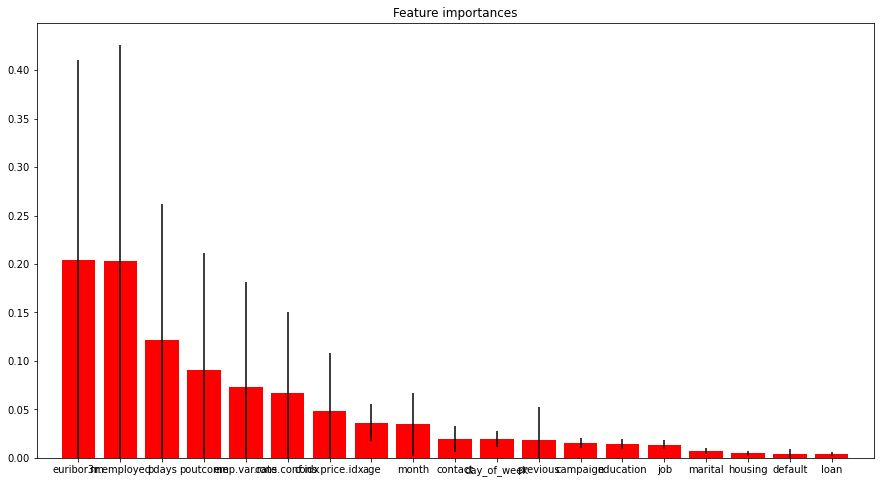

In [ ]:
clf = RandomForestClassifier(n_estimators=400, max_depth=8) #n_estimators is the number of trees, defalt = 100
clf.fit(X,y.ravel())

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

In [ ]:
Imbalance_ratio=4640/41188


print(Imbalance_ratio)

0.11265417111780131
